In [1]:
cd ..

/tmp/ml-cost-function


/tmp/ml-cost-function/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.compose import * 
from sklearn.preprocessing import *
from sklearn.feature_extraction import * 
from sklearn.feature_selection import *

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline

In [7]:
data = pd.read_csv('data/data.csv')
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0,Cash loans,F,N,N,0,103500.0,625536.0,26631.0,540000.0,...,0,NaN,1.0,0,1,0,0,NaN,0.694,0.479
1,0,Revolving loans,M,Y,Y,0,202500.0,292500.0,14625.0,292500.0,...,0,Sales staff,1.0,0,0,0,0,NaN,0.492,0.262
2,0,Cash loans,F,Y,Y,0,247500.0,1442596.5,46665.0,1129500.0,...,0,NaN,2.0,0,1,0,0,NaN,0.368,0.212
3,0,Cash loans,M,N,N,0,270000.0,545040.0,26509.5,450000.0,...,0,Security staff,2.0,0,1,0,0,NaN,0.755,0.213
4,0,Cash loans,M,Y,Y,0,450000.0,540000.0,56835.0,540000.0,...,0,Managers,2.0,0,0,0,0,0.279,0.720,0.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74508,0,Cash loans,F,N,Y,1,270000.0,1113840.0,49063.5,900000.0,...,1,High skill tech staff,3.0,0,1,0,0,NaN,0.480,0.738
74509,0,Cash loans,F,N,N,0,270000.0,755190.0,36459.0,675000.0,...,0,Managers,2.0,0,1,0,0,NaN,0.680,0.201
74510,0,Cash loans,F,N,N,0,315000.0,1174090.5,49873.5,1080000.0,...,0,Waiters/barmen staff,1.0,0,1,0,0,NaN,0.688,0.274
74511,0,Cash loans,F,N,Y,0,315000.0,1812456.0,49972.5,1620000.0,...,0,High skill tech staff,2.0,0,1,0,0,NaN,0.643,0.400


In [8]:
data = data.iloc[:, :20]
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,0,Cash loans,F,N,N,0,103500.0,625536.0,26631.0,540000.0,Family,Working,Secondary / secondary special,Single / not married,Municipal apartment,0.033,-14921,-3844,-602.0,-4632
1,0,Revolving loans,M,Y,Y,0,202500.0,292500.0,14625.0,292500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.010,-15458,-694,-9544.0,-3761
2,0,Cash loans,F,Y,Y,0,247500.0,1442596.5,46665.0,1129500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.072,-15603,-334,-3873.0,-5051
3,0,Cash loans,M,N,N,0,270000.0,545040.0,26509.5,450000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.072,-16392,-3015,-8902.0,-4407
4,0,Cash loans,M,Y,Y,0,450000.0,540000.0,56835.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.026,-10941,-4026,-910.0,-3215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74508,0,Cash loans,F,N,Y,1,270000.0,1113840.0,49063.5,900000.0,Children,Working,Higher education,Married,House / apartment,0.004,-16790,-3590,-6150.0,-330
74509,0,Cash loans,F,N,N,0,270000.0,755190.0,36459.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046,-18992,-1947,-4422.0,-2519
74510,0,Cash loans,F,N,N,0,315000.0,1174090.5,49873.5,1080000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,With parents,0.019,-17558,-2238,-4741.0,-1084
74511,0,Cash loans,F,N,Y,0,315000.0,1812456.0,49972.5,1620000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.033,-19480,-985,-1017.0,-3023


In [9]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),

    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", categorical_transformer, make_column_selector(dtype_exclude =np.number)),
    ]
)

In [10]:
X = data.drop(columns=['TARGET'])
y = data['TARGET']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
61261,Cash loans,F,Y,Y,1,225000.0,265500.0,12910.5,265500.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.025,-13110,-3064,-511.0,-8
61725,Cash loans,F,N,Y,0,157500.0,526491.0,32337.0,454500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.007,-11093,-1598,-4857.0,-2760
68198,Revolving loans,F,N,Y,2,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.009,-14063,-399,-2491.0,-69
36891,Cash loans,F,Y,N,0,270000.0,679500.0,64516.5,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020,-15019,-1970,-3129.0,-3268
45218,Cash loans,F,Y,Y,0,72000.0,292500.0,14355.0,292500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.029,-17590,-3170,-577.0,-1135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,Revolving loans,M,Y,N,1,157500.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020,-10237,-3564,-1644.0,-2872
6265,Cash loans,F,N,Y,0,189000.0,454455.0,17262.0,319500.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.019,-23193,365243,-1216.0,-4212
54886,Cash loans,F,Y,Y,2,202500.0,538704.0,23859.0,481500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025,-19330,-241,-245.0,-2837
860,Cash loans,F,N,Y,3,225000.0,1324440.0,47700.0,1170000.0,Unaccompanied,Commercial associate,Lower secondary,Married,House / apartment,0.019,-12977,-2633,-4436.0,-1657


In [13]:
X_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
70779,Cash loans,M,Y,Y,0,184500.0,123768.0,4792.5,81000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019,-21859,-4054,-9265.0,-4308
14510,Cash loans,F,N,N,0,76500.0,855000.0,24997.5,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.007,-15188,-3476,-4204.0,-4204
5073,Cash loans,M,Y,Y,0,450000.0,1971072.0,68512.5,1800000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072,-18547,-2129,-2233.0,-67
3057,Cash loans,M,Y,Y,0,153000.0,1006920.0,42790.5,900000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.019,-22462,365243,-8015.0,-4606
58330,Cash loans,M,Y,Y,0,135000.0,343377.0,27256.5,283500.0,Family,Working,Higher education,Married,House / apartment,0.031,-16874,-3756,-7974.0,-411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,Revolving loans,F,N,Y,0,137025.0,135000.0,6750.0,135000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.046,-13200,-99,-7067.0,-109
36311,Cash loans,F,N,Y,0,67500.0,284400.0,10215.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.029,-22985,365243,-8835.0,-4091
7760,Cash loans,F,N,Y,0,180000.0,1147257.0,41337.0,927000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.023,-15505,-109,-6215.0,-1903
675,Cash loans,F,N,Y,2,157500.0,945000.0,40167.0,945000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.020,-15077,-2064,-7407.0,-4417


In [14]:
pipeline = Pipeline(
    [
        ('sampler', RandomUnderSampler()),
        ("transformer", preprocessor),
        ('imputer', SimpleImputer(strategy='median')),
        # ('scaler', StandardScaler()),
        ('estimator', LogisticRegression()),    
    ]
)

In [15]:
grid = GridSearchCV(pipeline, param_grid={}, cv=5, scoring='f1', n_jobs=-1, return_train_score=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/tmp/ml-cost-function/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ml-cost-function/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampler', RandomUnderSampler()),
                                       ('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9b961bd90>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9b961a5c0>)])),
                                       ('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('estimator', LogisticRegression())]),
             n_jobs=-1, param_grid={}, return_train_score=True, scoring='f1',
             verbose=1)

In [16]:
def resultize(grid):

    res  = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head(5)
    columns = [k for k in res.columns  if "split" not in k ]
    res = res.loc[:, columns].round(2)
    return res

In [17]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.44,0.05,0.08,0.01,{},0.21,0.0,1,0.21,0.0


## First approch

In [19]:
def calcul_pnl_one_easy(montant, y_true, y_pred, taux=0.04, default_rate=1):

    if y_pred :
        return 0
    
    if y_true : 
        return -default_rate * montant

    return montant * taux

In [20]:
calcul_pnl_one_easy(100, 0, 0)

4.0

In [21]:
calcul_pnl_one_easy(100, 0, 1)

0

In [22]:
calcul_pnl_one_easy(100, 1, 0)

-100

In [23]:
calcul_pnl_one_easy(100, 1, 1)

0

In [24]:
y_pred_list = grid.predict(X_test)
y_pred_list 

array([0, 0, 0, ..., 1, 0, 0])

In [25]:
y_true_list = y_test.values
y_true_list

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
montant_list = X_test.loc[:, 'AMT_CREDIT'].values
montant_list

array([ 123768.,  855000., 1971072., ..., 1147257.,  945000.,  454500.])

In [ ]:
l1 = ["a", "b"]
l2 = [0 ,1]

In [28]:
v = 0
for m, y_true, y_pred in zip(montant_list, y_true_list, y_pred_list):
    v += calcul_pnl_one_easy(m, y_true=y_true, y_pred=y_pred)
v

-114492646.98000106

In [29]:
sum(montant_list)

13404531492.0

## 02 predict proba

In [33]:
y_pred_proba_list = grid.predict_proba(X_test)
y_pred_proba_list = list(y_pred_proba_list[ :, 0])
y_pred_proba_list = [round(x, 4) for x in y_pred_proba_list]
y_pred_proba_list

[0.573,
 0.6136,
 0.746,
 0.6386,
 0.5944,
 0.4954,
 0.6314,
 0.5388,
 0.6507,
 0.7426,
 0.513,
 0.3673,
 0.3291,
 0.7143,
 0.6623,
 0.5409,
 0.5471,
 0.7532,
 0.2566,
 0.4949,
 0.7131,
 0.5218,
 0.5528,
 0.5545,
 0.4276,
 0.8124,
 0.5628,
 0.8402,
 0.6227,
 0.5123,
 0.6461,
 0.3473,
 0.4855,
 0.2659,
 0.4487,
 0.5168,
 0.6613,
 0.6316,
 0.5818,
 0.4198,
 0.3417,
 0.4129,
 0.5143,
 0.5412,
 0.6096,
 0.559,
 0.4267,
 0.5327,
 0.547,
 0.7988,
 0.618,
 0.3313,
 0.4202,
 0.5208,
 0.6685,
 0.4311,
 0.6243,
 0.7452,
 0.3311,
 0.4326,
 0.5797,
 0.3864,
 0.487,
 0.6121,
 0.6799,
 0.5303,
 0.7098,
 0.3668,
 0.6063,
 0.4524,
 0.6219,
 0.4922,
 0.5893,
 0.5756,
 0.3139,
 0.5593,
 0.6576,
 0.4614,
 0.3534,
 0.4593,
 0.45,
 0.4612,
 0.4585,
 0.6304,
 0.47,
 0.7861,
 0.6638,
 0.4584,
 0.7223,
 0.2734,
 0.588,
 0.6346,
 0.6861,
 0.6396,
 0.8353,
 0.5244,
 0.6518,
 0.3518,
 0.7449,
 0.6715,
 0.3148,
 0.4275,
 0.5113,
 0.4518,
 0.6132,
 0.5172,
 0.8166,
 0.3982,
 0.2092,
 0.5838,
 0.7637,
 0.6046,
 0.4

In [36]:
def calcul_pnl_one_complexe(montant, 
                            y_true, 
                            y_pred_proba, 
                            taux=0.04, 
                            default_rate=1, 
                            threshold=0.5, ):


    y_pred = 0 if y_pred_proba > threshold else 1

    if y_pred : 
        return 0
    
    if y_true :
        return -default_rate* montant

    return montant * taux

In [37]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba)
v

-113743974.60000107

In [38]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba,threshold=0.0)
v

-536612589.71999776

In [39]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba,threshold=1)
v

0

In [40]:
threshold_list = np.linspace(0, 1, 100)
pnl_list = []

_
taux = 0.04
default_rate = 1 
for threshold in threshold_list:
    v = 0
    for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
        v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba,threshold=threshold, default_rate=default_rate, taux=taux  )
    pnl_list.append(v)

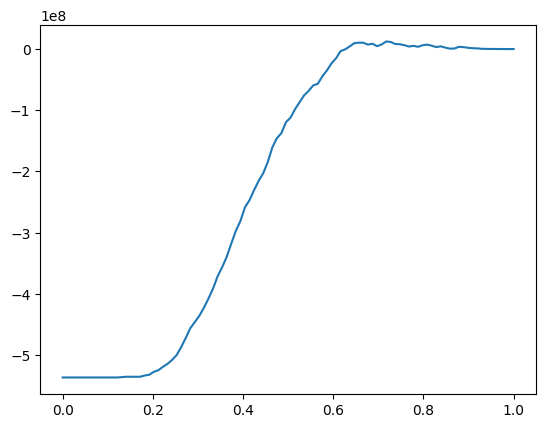

In [41]:
plt.plot(threshold_list, pnl_list)

In [43]:
import plotly.express as px


px.line(x=threshold_list, y=pnl_list)

In [46]:
pnl_df = pd.DataFrame({'threshold': threshold_list, 'pnl': pnl_list}).sort_values(by='pnl', ascending=False)
pnl_df

,threshold,pnl
71,0.717172,1.240057e+07
72,0.727273,1.154706e+07
65,0.656566,1.041550e+07
66,0.666667,1.033310e+07
64,0.646465,9.618816e+06
...,...,...
9,0.090909,-5.366126e+08
10,0.101010,-5.366126e+08
0,0.000000,-5.366126e+08
11,0.111111,-5.366340e+08


In [47]:
pnl_df.sort_values(by='pnl', ascending=False).head(10)

,threshold,pnl
71,0.717172,12400570.80
72,0.727273,11547057.42
65,0.656566,10415503.98
66,0.666667,10333101.78
64,0.646465,9618816.06
68,0.686869,8715344.76
73,0.737374,8302547.88
74,0.747475,7880981.76
70,0.707071,7522774.56
67,0.676768,7328495.34


In [54]:
def analyse_pnl(taux = 0.04, default_rate = 1 ):


    threshold_list = np.linspace(0, 1, 100)
    pnl_list = []

    for threshold in threshold_list:
        v = 0
        for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
            v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba,threshold=threshold, default_rate=default_rate, taux=taux  )
        pnl_list.append(v)

    fig = px.line(x=threshold_list, y=pnl_list)
    fig.show()

In [55]:
analyse_pnl(0.04, 1)

In [57]:
analyse_pnl(0.04, 0.25)

In [58]:
analyse_pnl(0.03, 0.25)

## 03 With Good price

In [ ]:
def calcul_pnl_one_goods(montant, 
                            good_price,
                            y_true, 
                            y_pred_proba, 
                            taux=0.03, 
                            loss_goods_rate=0.3,
                            threshold=0.5,
                            cost_evaluation=100,):
    """ """


    y_pred = 0 if y_pred_proba > threshold else 1

    if y_pred : 
        return - cost_evaluation
    
    if y_true :
        value = (good_price * (1-loss_goods_rate)) -  montant
        return  value if value < 0 else 0

    return (montant * taux) - cost_evaluation

In [ ]:
data.columns

In [ ]:
goods_list = X_test.loc[:, 'AMT_GOODS_PRICE'].values
goods_list

In [ ]:
threshold_list = np.linspace(0, 1, 100)
pnl_list = []

for threshold in threshold_list:
    v = 0
    for m, g, y_true, y_pred_proba in zip(montant_list, goods_list, y_true_list, y_pred_proba_list):
        v += calcul_pnl_one_goods(m, g, y_true=y_true, y_pred_proba=y_pred_proba,threshold=threshold)
    pnl_list.append(v)

In [ ]:
import plotly.express as px


px.line(x=threshold_list, y=pnl_list)